In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

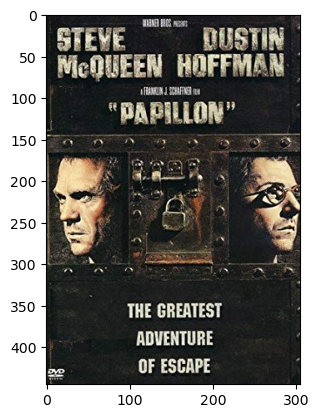

In [3]:
image = cv.imread('./papilon.jpg')
plt.imshow(image[:,:,::-1])